## 1. Import modules & csv files

In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


applications = pd.read_csv("application_record.csv")
credit_hist = pd.read_csv("credit_record.csv")
print(f"Total number of entries: {applications.shape[0]}")
applications.head()

Total number of entries: 438557


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [308]:
def remove_outlier_df(df_in, col_names):
    '''
    Remove outliers in a given column from a Pandas dataframe
    Note: Removes the entry corresponding to outlier.
    Uses +- 1.5 IQR as criteria
    Warning: Modifies the input directly!
    '''
    if(isinstance(col_names, list)):
        for col in col_names:
            q1 = df_in[col].quantile(0.25)
            q3 = df_in[col].quantile(0.75)
            iqr = q3-q1
            low  = q1-1.5*iqr
            high = q3+1.5*iqr
            df_in.drop(df_in[(df_in[col] < low) | (df_in[col] > high)].index, inplace=True)
    elif isinstance(col_names, str):
        q1 = df_in[col_names].quantile(0.25)
        q3 = df_in[col_names].quantile(0.75)
        iqr = q3-q1
        low  = q1-1.5*iqr
        high = q3+1.5*iqr
        df_in.drop(df_in[(df_in[col_names] < low) | (df_in[col_names] > high)].index, inplace=True)


def remove_outlier_series(series_in):
    '''
    Removes outliers from a pandas series
    +- 1.5 IQR as outlier criteria
    Warning: Modifies the input directly!
    '''
    q1 = series_in.quantile(0.25)
    q3 = series_in.quantile(0.75)
    iqr = q3-q1
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    series.drop(series_in[(series_in < fence_low) | (series_in > fence_high)], inplace=True)

## 2. Pre-processing of application records
Pre-processing done:
- Remove duplicates
- Remove outliers

In [309]:
#Remove duplicate IDs, keep first occurence of that ID
applications.drop_duplicates("ID", keep="first", inplace=True)

### 2.1 Visualize some key variables

Text(0.5, 1.0, 'Number of family members')

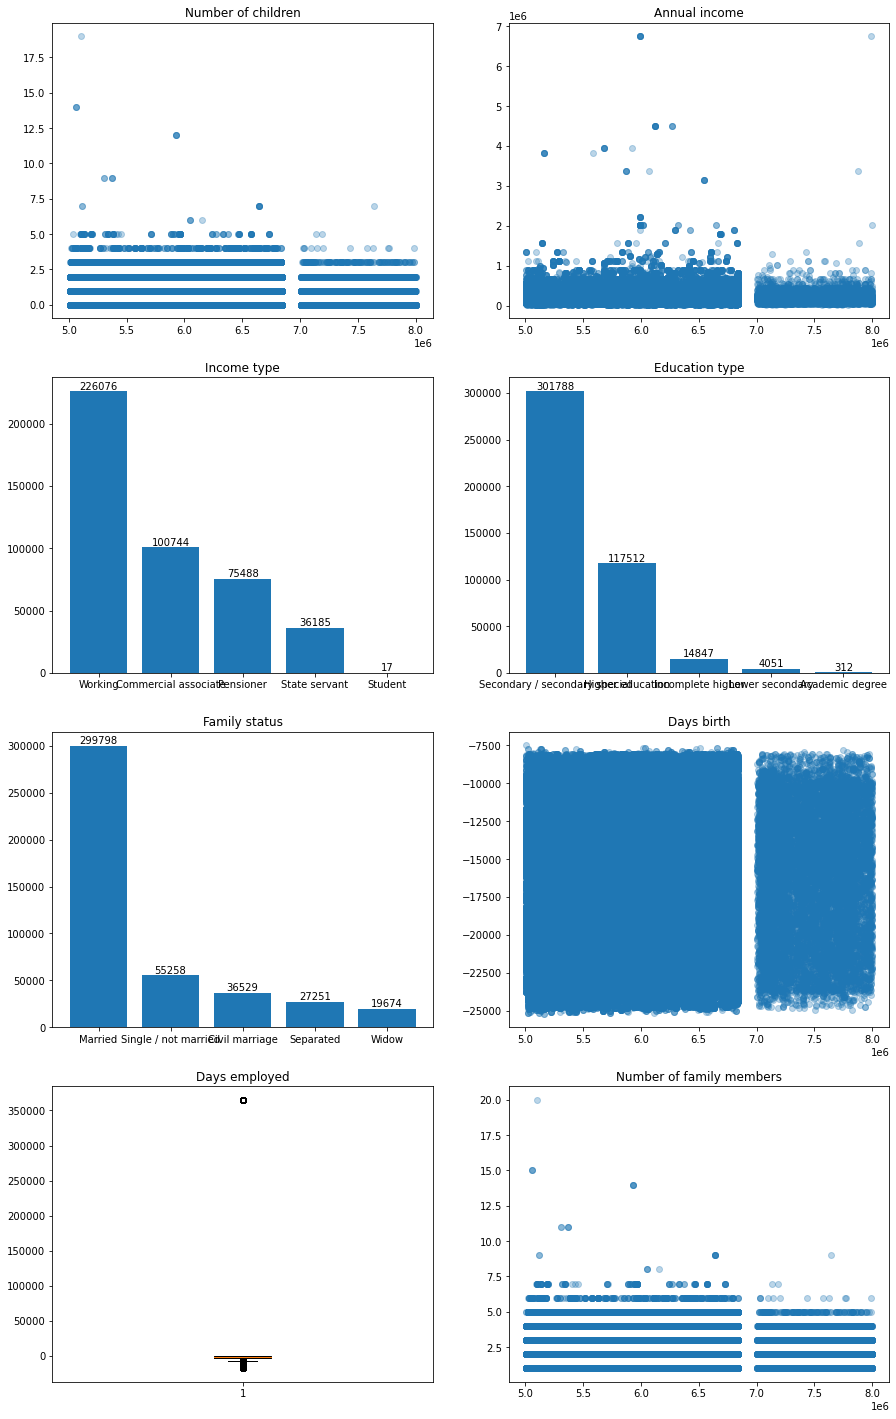

In [310]:
fig, axs = plt.subplots(4, 2,figsize=(15,25))
# for ax in axs.flat:
#     ax.set(xlabel="ID")

x = applications["ID"]
income_types = applications["NAME_INCOME_TYPE"].value_counts()
educ_types = applications["NAME_EDUCATION_TYPE"].value_counts()
family_statuses = applications["NAME_FAMILY_STATUS"].value_counts()
occupation_types = applications["OCCUPATION_TYPE"].value_counts()


axs[0,0].scatter(x, applications["CNT_CHILDREN"], alpha=0.3)
axs[0,0].set_title("Number of children")
axs[0,1].scatter(x, applications["AMT_INCOME_TOTAL"], alpha=0.3)
axs[0,1].set_title("Annual income")

income_type_bar = axs[1,0].bar(income_types.keys(), income_types)
axs[1,0].bar_label(income_type_bar)
axs[1,0].set_title("Income type")

educ_types_bar = axs[1,1].bar(educ_types.keys(), educ_types)
axs[1,1].bar_label(educ_types_bar)
axs[1,1].set_title("Education type")

family_statuses_bar = axs[2,0].bar(family_statuses.keys(), family_statuses)
axs[2,0].bar_label(family_statuses_bar)
axs[2,0].set_title("Family status")

axs[2,1].scatter(x, applications["DAYS_BIRTH"], alpha=0.3)
axs[2,1].set_title("Days birth")
axs[3,0].boxplot(applications["DAYS_EMPLOYED"])
axs[3,0].set_title("Days employed")

# occupation_types_bar = axs[3,1].bar(occupation_types.keys(), occupation_types)
# axs[3,1].bar_label(occupation_types_bar)
# axs[3,1].set_title("Occupation type")
axs[3,1].scatter(x, applications["CNT_FAM_MEMBERS"], alpha=0.3)
axs[3,1].set_title("Number of family members")

In [311]:
applications.loc[applications["DAYS_EMPLOYED"] > 0].shape[0]

75324

From the above, there seems to be outliers in number of children, annual income, number of family members and days employed.

We will drop outlier entries for the former 3.

For days employed, we will drop the column entirely, as many entries seem to be misrecorded with value 365243.

Text(0.5, 1.0, 'Occupation type')

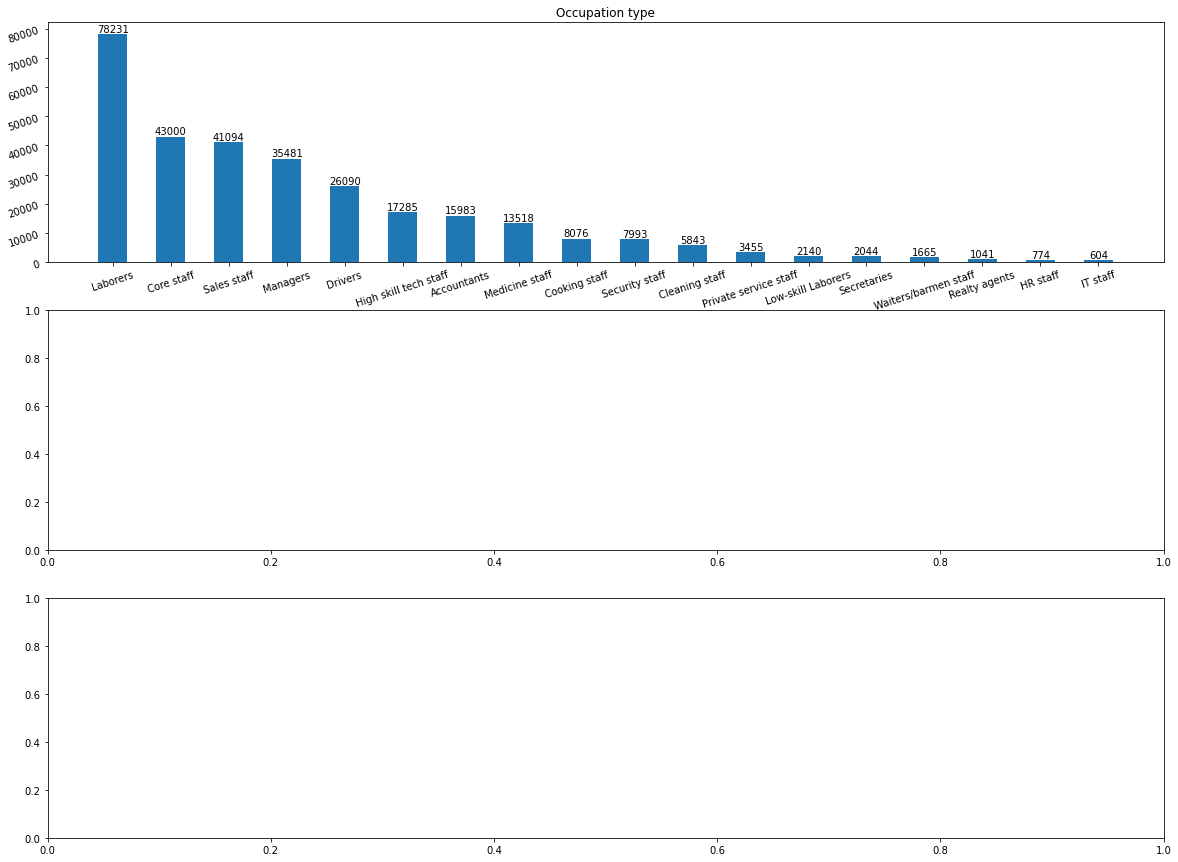

In [312]:
fig, axs = plt.subplots(3,1, figsize=(20,15))
occupation_types_bar = axs[0].bar(occupation_types.keys(), occupation_types, width=0.5)
axs[0].bar_label(occupation_types_bar)
axs[0].tick_params(rotation=18)
axs[0].set_title("Occupation type")

In [313]:
applications.drop("DAYS_EMPLOYED", axis=1, inplace=True)

In [314]:
# Remove outliers
remove_outlier_df(applications, "AMT_INCOME_TOTAL")

#Outliers defined as >5 children and >8 family members
applications.drop((applications[applications["CNT_CHILDREN"] > 5]).index, inplace=True)
applications.drop((applications[applications["CNT_FAM_MEMBERS"] > 8]).index, inplace=True)

In [315]:
applications.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,1,0,1,1,Sales staff,1.0


In [316]:
applications.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419378 entries, 2 to 438556
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   419378 non-null  int64  
 1   CODE_GENDER          419378 non-null  object 
 2   FLAG_OWN_CAR         419378 non-null  object 
 3   FLAG_OWN_REALTY      419378 non-null  object 
 4   CNT_CHILDREN         419378 non-null  int64  
 5   AMT_INCOME_TOTAL     419378 non-null  float64
 6   NAME_INCOME_TYPE     419378 non-null  object 
 7   NAME_EDUCATION_TYPE  419378 non-null  object 
 8   NAME_FAMILY_STATUS   419378 non-null  object 
 9   NAME_HOUSING_TYPE    419378 non-null  object 
 10  DAYS_BIRTH           419378 non-null  int64  
 11  FLAG_MOBIL           419378 non-null  int64  
 12  FLAG_WORK_PHONE      419378 non-null  int64  
 13  FLAG_PHONE           419378 non-null  int64  
 14  FLAG_EMAIL           419378 non-null  int64  
 15  OCCUPATION_TYPE  

Defining income groups (may be useful for data viz?)

In [317]:
# Represents interval between each income group 
# e.g. 50000 means the groups are: <50k, 50k-100k, 100k-150k and so on

INCOME_GROUP_INTERVAL = 50000


# Define income groups. Numbers represent upper limit 
# e.g. 150000 means < 150000 and > 100000 (the previous number in the list)
income_groups = []
income_group_cutoff = INCOME_GROUP_INTERVAL
while income_group_cutoff < apps["AMT_INCOME_TOTAL"].max():
    income_groups.append(income_group_cutoff)
    income_group_cutoff += INCOME_GROUP_INTERVAL
income_groups.append(income_group_cutoff)

print(income_groups)

[50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000]


In [318]:
# app_income_groups = []
# for income in income_groups:
#     income_lower = income - INCOME_GROUP_INTERVAL
#     app_income_groups.append(applications.loc[(applications["AMT_INCOME_TOTAL"]<=income) & 
#                                                   (applications["AMT_INCOME_TOTAL"]>income_lower),
#                                                   ["ID", "AMT_INCOME_TOTAL"]])
#     print(f"Appended {income_lower} to {income}")

## 3. Pre-processing of credit histories
Pre-processing done:
- Assign a "risk score" to each month's credit history record. Higher score means more risk of overdue/default.
    - Step 1: Convert STATUS to range of 0 - 6 based on credit status
    - Step 2: Risk score$={e^{x/e}-1}$, where x = STATUS. The idea is that extreme overdue (e.g. >150 days) is far riskier than 1~29 days overdue

| Credit status                 |STATUS |RISK_SCORE|
|:------------------------------|:------|:---------|
| Paid-off loan or no loan      | 0     | 0        |
| 1 ~ 29 days past due          | 1     | 0.4447   |
| 30 ~ 59 days past due         | 2     | 1.0871   |
| 60 ~ 89 days past due         | 3     | 2.0151   |
| 90 ~ 119 days past due        | 4     | 3.3558   |
| 120 ~ 149 days past due       | 5     | 5.2927   |
| >150 days past due, write-off | 6     | 8.0909   |

- Group entries by ID. Each ID now only has 1 entry instead of multiple entries

In [319]:
#Create a deep copy of credit_hist to avoid affecting original dataframe
credit_hist_grouped = credit_hist.copy(deep=True)

# Replace STATUS "X" and "C" with "-1"
credit_hist_grouped["STATUS"].replace(["X", "C"], "-1", inplace=True)

# Convert from str to int 
credit_hist_grouped["STATUS"] = credit_hist_grouped["STATUS"].astype(int)

# Convert status to risk score for that month
e = 2.718281828 # Euler's number
credit_hist_grouped["RISK_SCORE"] = np.exp((credit_hist_grouped["STATUS"] + 1) / e) - 1

# Remove STATUS column
credit_hist_grouped.drop(["STATUS"], axis=1, inplace=True)

In [320]:
#Visualize some of the entries
credit_hist_grouped.iloc[224:235,:]

,ID,MONTHS_BALANCE,RISK_SCORE
224,5001720,0,1.087065
225,5001720,-1,0.444668
226,5001720,-2,0.444668
227,5001720,-3,1.087065
228,5001720,-4,1.087065
229,5001720,-5,0.444668
230,5001720,-6,1.087065
231,5001720,-7,1.087065
232,5001720,-8,0.444668
233,5001720,-9,0.444668


In [321]:
# Record how many months ago was that particular record for, in terms of positive numbers (e.g. 1 month ago, 2 months ago)
credit_hist_grouped["MONTHS_AGO"] = credit_hist_grouped["MONTHS_BALANCE"] * -1

# Remove MONTHS_BALANCE column
credit_hist_grouped.drop(["MONTHS_BALANCE"], axis=1, inplace=True)

In [322]:
# Collapse credit_hist, by grouping all the entries with the same ID together. 
# For MONTHS_AGO we take the max value amongst all entries with the same ID. 
# For RISK_SCORE we take average across all months for that person.

credit_hist_agg = credit_hist_grouped.groupby(["ID"]).agg(
    {
        "RISK_SCORE": "mean",
        "MONTHS_AGO": max
    }
)

In [323]:
# Record if the person has history of voerdue or not
credit_hist_agg["HAS_OVERDUE"] = (credit_hist_agg["RISK_SCORE"] > 0).astype(int)

In [324]:
# CREDIT_HIST_LEN records the length of their credit history
credit_hist_agg["CREDIT_HIST_LEN"] = credit_hist_agg["MONTHS_AGO"] + 1

# Remove MONTHS_AGO column
credit_hist_agg.drop(["MONTHS_AGO"], axis=1, inplace=True)

credit_hist_agg.head(10)

,RISK_SCORE,HAS_OVERDUE,CREDIT_HIST_LEN
ID,,,
5001711,0.333501,1,4
5001712,0.234036,1,19
5001713,0.000000,0,22
5001714,0.000000,0,15
5001715,0.000000,0,60
5001717,0.343607,1,22
5001718,0.329389,1,39
5001719,0.020682,1,43
5001720,0.569578,1,36


In [325]:
applications.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419378 entries, 2 to 438556
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   419378 non-null  int64  
 1   CODE_GENDER          419378 non-null  object 
 2   FLAG_OWN_CAR         419378 non-null  object 
 3   FLAG_OWN_REALTY      419378 non-null  object 
 4   CNT_CHILDREN         419378 non-null  int64  
 5   AMT_INCOME_TOTAL     419378 non-null  float64
 6   NAME_INCOME_TYPE     419378 non-null  object 
 7   NAME_EDUCATION_TYPE  419378 non-null  object 
 8   NAME_FAMILY_STATUS   419378 non-null  object 
 9   NAME_HOUSING_TYPE    419378 non-null  object 
 10  DAYS_BIRTH           419378 non-null  int64  
 11  FLAG_MOBIL           419378 non-null  int64  
 12  FLAG_WORK_PHONE      419378 non-null  int64  
 13  FLAG_PHONE           419378 non-null  int64  
 14  FLAG_EMAIL           419378 non-null  int64  
 15  OCCUPATION_TYPE  

In [326]:
credit_hist_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45985 entries, 5001711 to 5150487
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RISK_SCORE       45985 non-null  float64
 1   HAS_OVERDUE      45985 non-null  int32  
 2   CREDIT_HIST_LEN  45985 non-null  int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 1.2 MB


## 4. Merge the two dataframes together
In essence, attaching the credit status & credit history length to each individual's profile.

Only keep rows with IDs that appear in both application record and credit history 
- i.e. if a person has an application record but no credit history, we discard that entry

In [327]:
# Merge the two dataframes together
apps_merged = pd.merge(applications, credit_hist_agg, how="inner", on="ID")

apps_merged.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,RISK_SCORE,HAS_OVERDUE,CREDIT_HIST_LEN
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,1,0,0,0,Security staff,2.0,0.103756,1,30
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,1,0,1,1,Sales staff,1.0,0.177867,1,5
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,1,0,1,1,Sales staff,1.0,0.000000,0,27
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,1,0,1,1,Sales staff,1.0,0.098815,1,27
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,1,0,1,1,Sales staff,1.0,0.068410,1,39


However, there are many entries that have different credit histories and IDs but have the same values for ALL other columns. 

Chances of two people having the exact same gender, own a car, own a house, number of children, annual income, ... , number of family members is infinitely low. Hence most likely to be duplicated entries

Remove these duplicated entries, keeping the entry with longest credit history (rationale: more months of data available)

In [328]:
# Collect list of column names in application record
columns = list(applications.columns)
columns.remove("ID")
print(columns)

# Remove duplicated entries (with same gender, own a car, ..., family members), keeping entry with longest credit history
apps_merged = apps_merged.sort_values("CREDIT_HIST_LEN", ascending=False).drop_duplicates(subset=columns)
apps_merged.sort_index()

apps_merged.info()

['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9353 entries, 33733 to 18421
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9353 non-null   int64  
 1   CODE_GENDER          9353 non-null   object 
 2   FLAG_OWN_CAR         9353 non-null   object 
 3   FLAG_OWN_REALTY      9353 non-null   object 
 4   CNT_CHILDREN         9353 non-null   int64  
 5   AMT_INCOME_TOTAL     9353 non-null   float64
 6   NAME_INCOME_TYPE     9353 non-null   object 
 7   NAME_EDUCATION_TYPE  9353 non-null   object 
 8   NAME_FAMILY_STATUS   9353 non-null   object 
 9   NAME_HOUSING_TYPE    9353 non-null   object 
 1

In [329]:
# Remove OCCUPATION_TYPE as it has many null values, as can be seen from the info() above
apps_merged.drop(["OCCUPATION_TYPE"], axis=1, inplace=True)

In [330]:
apps_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9353 entries, 33733 to 18421
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9353 non-null   int64  
 1   CODE_GENDER          9353 non-null   object 
 2   FLAG_OWN_CAR         9353 non-null   object 
 3   FLAG_OWN_REALTY      9353 non-null   object 
 4   CNT_CHILDREN         9353 non-null   int64  
 5   AMT_INCOME_TOTAL     9353 non-null   float64
 6   NAME_INCOME_TYPE     9353 non-null   object 
 7   NAME_EDUCATION_TYPE  9353 non-null   object 
 8   NAME_FAMILY_STATUS   9353 non-null   object 
 9   NAME_HOUSING_TYPE    9353 non-null   object 
 10  DAYS_BIRTH           9353 non-null   int64  
 11  FLAG_MOBIL           9353 non-null   int64  
 12  FLAG_WORK_PHONE      9353 non-null   int64  
 13  FLAG_PHONE           9353 non-null   int64  
 14  FLAG_EMAIL           9353 non-null   int64  
 15  CNT_FAM_MEMBERS      9353 non-nul

In [289]:
apps_merged["HAS_OVERDUE"].value_counts()

Series([], Name: HAS_OVERDUE, dtype: int64)

## 5. Data visualisation

### Distributions of variables

#### Genders

C:\Users\Tal\AppData\Local\Temp/ipykernel_6104/2405602667.py:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(gender_counts,


ValueError: 'label' must be of length 'x'

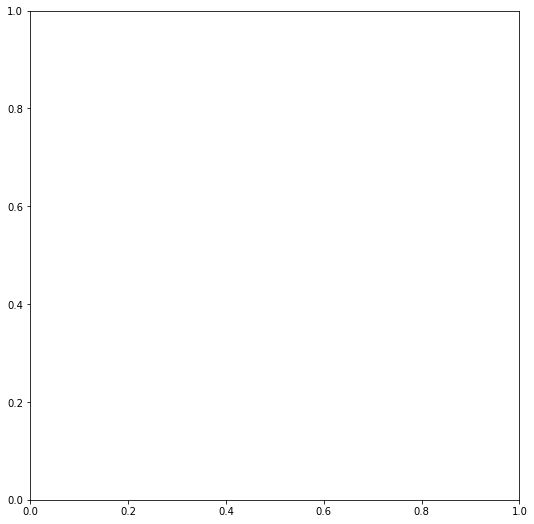

In [290]:
gender_counts = apps_merged["CODE_GENDER"].value_counts()
plt.figure(figsize=(9,9))
plt.pie(gender_counts, 
        labels=["F", "M"],
        autopct= lambda x: f"{int(((x/100)*gender_counts.sum()).round())}",
        colors=["c", "#ffa600"],
        textprops={'fontsize': 26}
       )
plt.title("Gender of applicants",
          fontdict={"fontsize": 32}
         )

plt.show()

#### Income levels

In [ ]:
plt.figure(figsize=(15,6))
plt.boxplot(apps_merged["AMT_INCOME_TOTAL"], vert=False)
plt.title("Income levels",
          fontdict={"fontsize":18}
         )

plt.show()

Define income groups

In [ ]:
# Represents interval between each income group 
# e.g. 50000 means the groups are: <50k, 50k-100k, 100k-150k and so on

INCOME_GROUP_INTERVAL = 50000
#Define the income for highest income group e.g. 400000 means >400k
INCOME_GROUP_HIGHEST = 400000


# Define income groups. Numbers represent upper limit 
# e.g. 150000 means < 150000 and > 100000 (the previous number in the list)
income_groups = []
income_group_cutoff = INCOME_GROUP_INTERVAL
while income_group_cutoff < INCOME_GROUP_HIGHEST:
    income_groups.append(income_group_cutoff)
    income_group_cutoff += INCOME_GROUP_INTERVAL
income_groups.append(income_group_cutoff)

print(income_groups)

In [ ]:
apps_merged["INCOME_GROUP"] = 

From the above box plot, we can see that there are several outliers in the annual income category

In [ ]:
#Remove outliers in the income category
income_new = remove_outlier_series(apps_merged["AMT_INCOME_TOTAL"])

In [ ]:
# plt.figure(figsize=(15,6))
# plt.boxplot(income_new, vert=False)

Plot histogram of income levels (outliers removed)

In [ ]:
plt.figure(figsize=(15,6))
# plt.hist(applications["AMT_INCOME_TOTAL"], 150)
plt.hist(income_new, 10)
plt.ticklabel_format(style="plain")
plt.title("Histogram of income levels (with outliers removed)",
          fontdict={"fontsize": 18}
         )

plt.show()

Number of children

In [ ]:
plt.figure(figsize=(15,6))
# plt.hist(applications["AMT_INCOME_TOTAL"], 150)
plt.hist(apps_merged["CNT_CHILDREN"])
plt.title("Histogram of number of children",
          fontdict={"fontsize": 18}
         )

plt.show()

Clearly, the number of children for some entries seem to be incorrect, as some entries seem to have >10 children

In [ ]:
# Remove erroneous data from "CNT_CHILDREN" category.
# Criteria: If an entry has >5 children, treat as erroneous data
# Counts the number of applicants with 0,1,...,5 children
num_children = apps_merged["CNT_CHILDREN"].value_counts()
num_children = num_children.loc[num_children.keys() <= 5]

print(num_children)

In [ ]:
#Plot with subplots as we need to add the numerical values to bar chart
fig, ax = plt.subplots(figsize=(9,9))
bars = ax.bar(num_children.keys(), num_children)
plt.title("Number of applicants with 0,1,...,5 children",
          fontdict={"fontsize": 18}
         )
ax.bar_label(bars)

In [ ]:
plt.scatter(apps_merged["RISK_SCORE"], apps_merged["CNT_CHILDREN"])

In [ ]:
new_df = remove_outlier_df(apps_merged, "AMT_INCOME_TOTAL")
plt.scatter(new_df["RISK_SCORE"], new_df["AMT_INCOME_TOTAL"])

In [ ]:
plt.hist(new_df.loc[new_df["CODE_GENDER"]=="M", "AMT_INCOME_TOTAL"])

In [ ]:
plt.hist(new_df.loc[new_df["CODE_GENDER"]=="F", "AMT_INCOME_TOTAL"])